<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/Typhoon_modeling_Korea_20221216(78%2C910)_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATA

In [1]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')             

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
%cd /content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon

/content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon


In [4]:
df = pd.read_csv('19592021korea(2).csv')

칼럼별 명칭

In [5]:
df.columns

Index(['year', 'mon', 'amo', 'aao', 'ao', 'emi', 'gmo', 'nino3', 'nino4',
       'pdo', 'pna', 'qbo', 'freq', 'inten'],
      dtype='object')

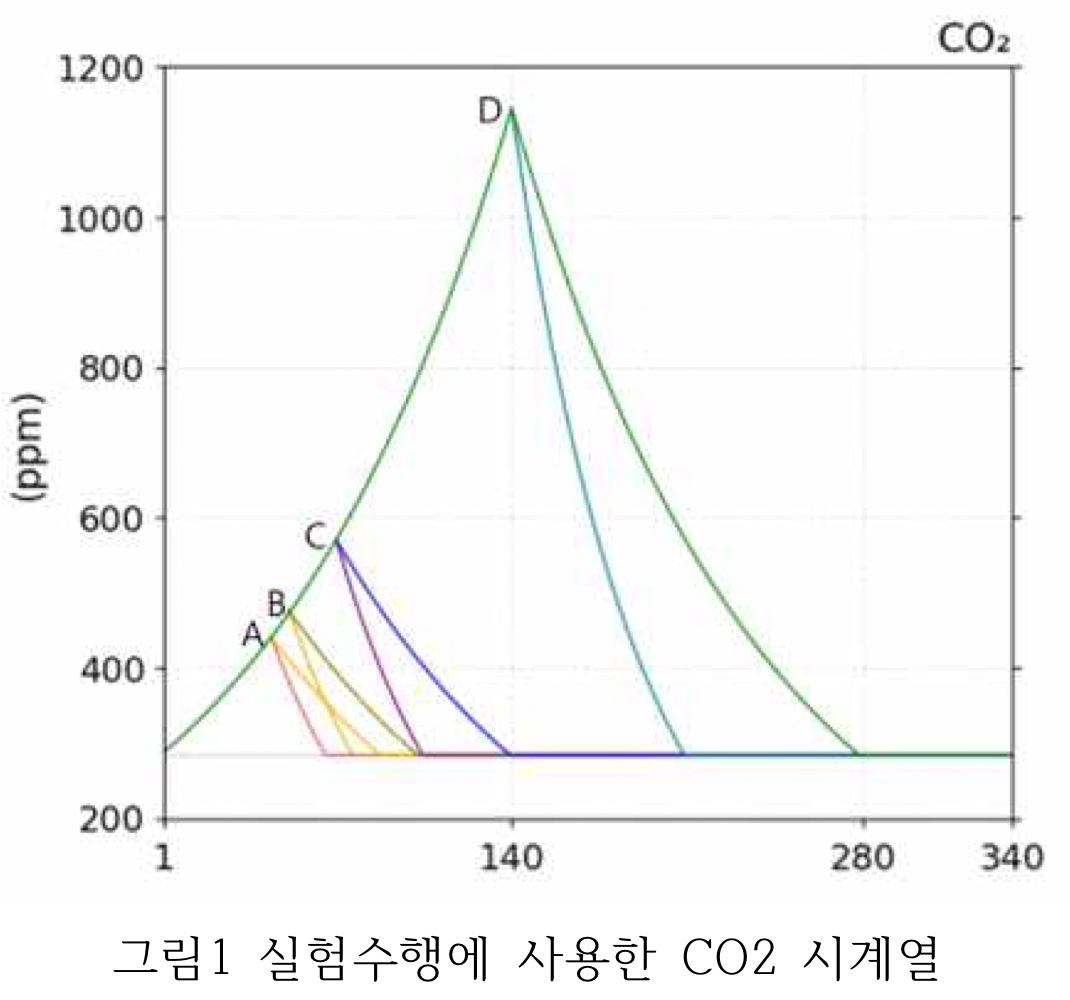

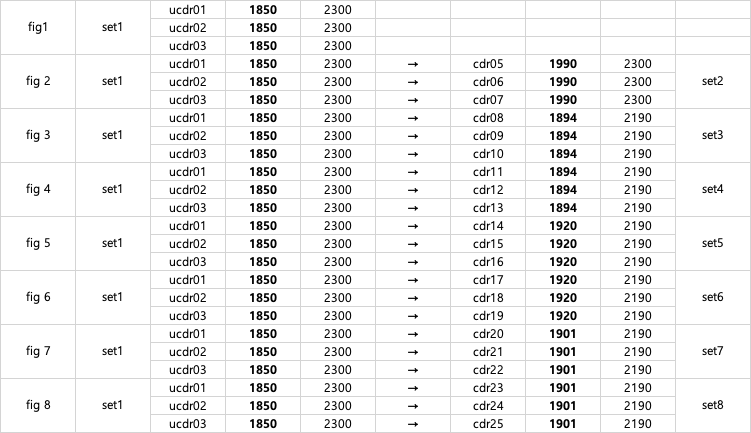

# Data Splitting


In [6]:
df = df[df["year"].isin(list(range(1979,2021,1)))]

In [7]:
x = df.iloc[:,2:12]
y1 = df.iloc[:,12:13]
y2 = df.iloc[:,13:]

#Modelling


In [8]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from statistics import mean

In [9]:
cv = LeaveOneOut()

model5 = RandomForestClassifier()
rmse5= np.sqrt(-cross_val_score(model5, x, y1, scoring="neg_mean_squared_error", cv = cv))
model5.fit(x, y1)

RandomForestClassifier()

In [10]:
df["yearmon"] = df["year"].apply(str) + ' ' + df["mon"].apply(str)

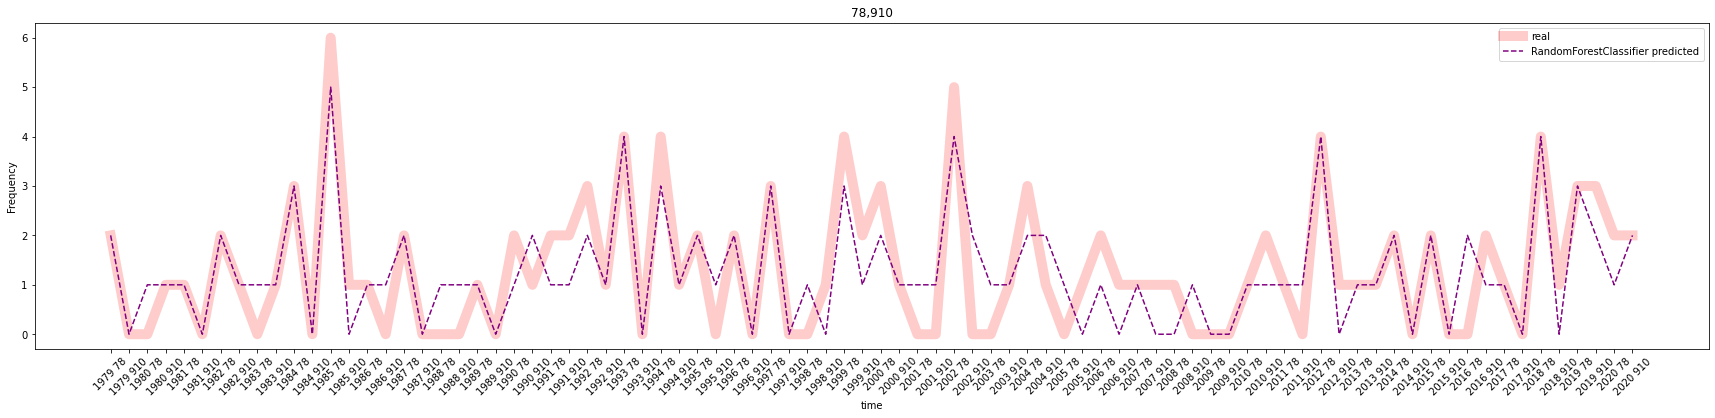

             0      freq
0     1.000000  0.829793
freq  0.829793  1.000000 
 0    1.25
dtype: float64


In [11]:
rmse5 = pd.DataFrame(rmse5)
rmse5 = rmse5.set_index(df["yearmon"])
y1 = y1.set_index(df["yearmon"])
plt.figure(figsize=(30, 6))  
plt.plot(y1, color='red', label='real', alpha=0.2, linewidth = 10)
plt.plot(rmse5, color='purple',linestyle = '--', label='RandomForestClassifier predicted')
plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Corr1 = pd.merge(rmse5, y1, on='yearmon')

print(Corr1.corr(),"\n",rmse5.mean())

# Hist / 585 (1850 ~ 2014, 2015 ~ 2099)

In [12]:
%cd /content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon/future
df1 = pd.read_csv('hist585.csv')

/content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon/future


In [13]:
df1 = df1[df1["mon"].isin([7,8,9,10])]
df2 = df1[df1["mon"].isin([7,8])]
df3 = df1[df1["mon"].isin([9,10])]

In [14]:
df2 = df2.groupby(['year'], as_index=False).mean()
df3 = df3.groupby(['year'], as_index=False).mean()

In [15]:
df4 = pd.concat([df2,df3])
df4 = df4.sort_values(by=['year'],ascending = True)
X = df4.iloc[:,2:12]

In [16]:
Y = model5.predict(X)

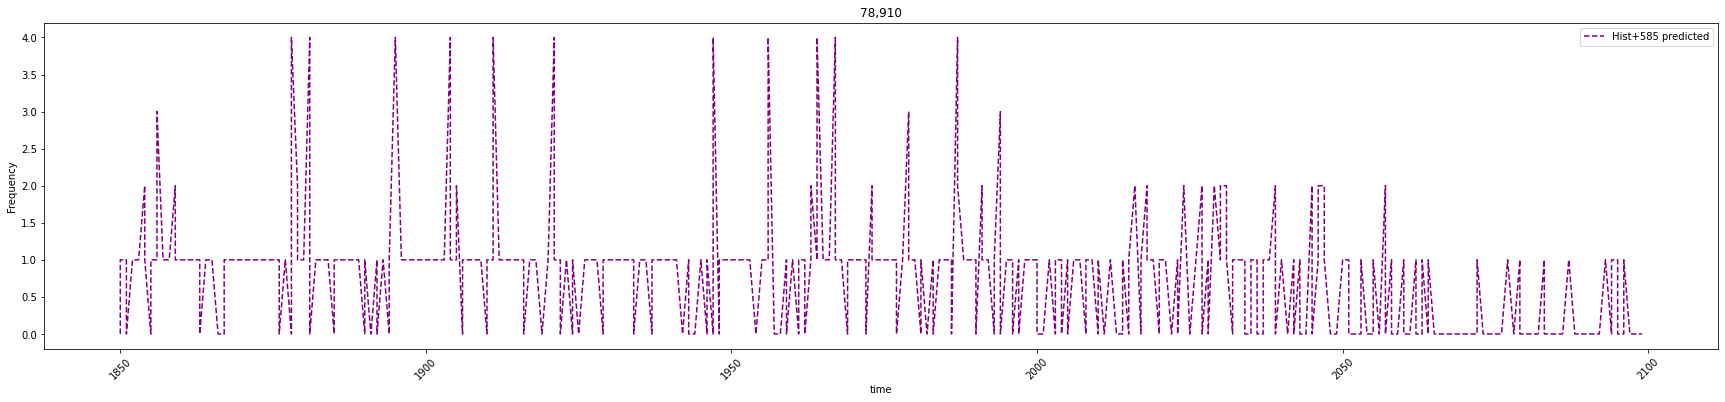

In [17]:
cv = LeaveOneOut()

Y = pd.DataFrame(Y)
Y = Y.set_index(df4["year"])
plt.figure(figsize=(30, 6))  
plt.plot(Y, color='purple',linestyle = '--', label='Hist+585 predicted')
plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Fig1 - ucdr01, ucdr02, ucdr03

In [18]:
df5 = pd.read_csv('ucdr01.csv')
df6 = pd.read_csv('ucdr02.csv')
df7 = pd.read_csv('ucdr03.csv')

In [19]:
df5 = df5[df5["mon"].isin([7,8,9,10])]
df5a = df5[df5["mon"].isin([7,8])]
df5b = df5[df5["mon"].isin([9,10])]
df5a = df5a.groupby(['year'], as_index=False).mean()
df5b = df5b.groupby(['year'], as_index=False).mean()
df5c = pd.concat([df5a,df5b])
df5c = df5c.sort_values(by=['year'],ascending = True)
X1 = df5c.iloc[:,2:12]

In [20]:
df6 = df6[df6["mon"].isin([7,8,9,10])]
df6a = df6[df6["mon"].isin([7,8])]
df6b = df6[df6["mon"].isin([9,10])]
df6a = df6a.groupby(['year'], as_index=False).mean()
df6b = df6b.groupby(['year'], as_index=False).mean()
df6c = pd.concat([df6a,df6b])
df6c = df6c.sort_values(by=['year'],ascending = True)
X2 = df6c.iloc[:,2:12]

In [21]:
df7 = df7[df7["mon"].isin([7,8,9,10])]
df7a = df7[df7["mon"].isin([7,8])]
df7b = df7[df7["mon"].isin([9,10])]
df7a = df7a.groupby(['year'], as_index=False).mean()
df7b = df7b.groupby(['year'], as_index=False).mean()
df7c = pd.concat([df7a,df7b])
df7c = df7c.sort_values(by=['year'],ascending = True)
X3 = df7c.iloc[:,2:12]

In [22]:
Y1 = model5.predict(X1)
Y2 = model5.predict(X2)
Y3 = model5.predict(X3)

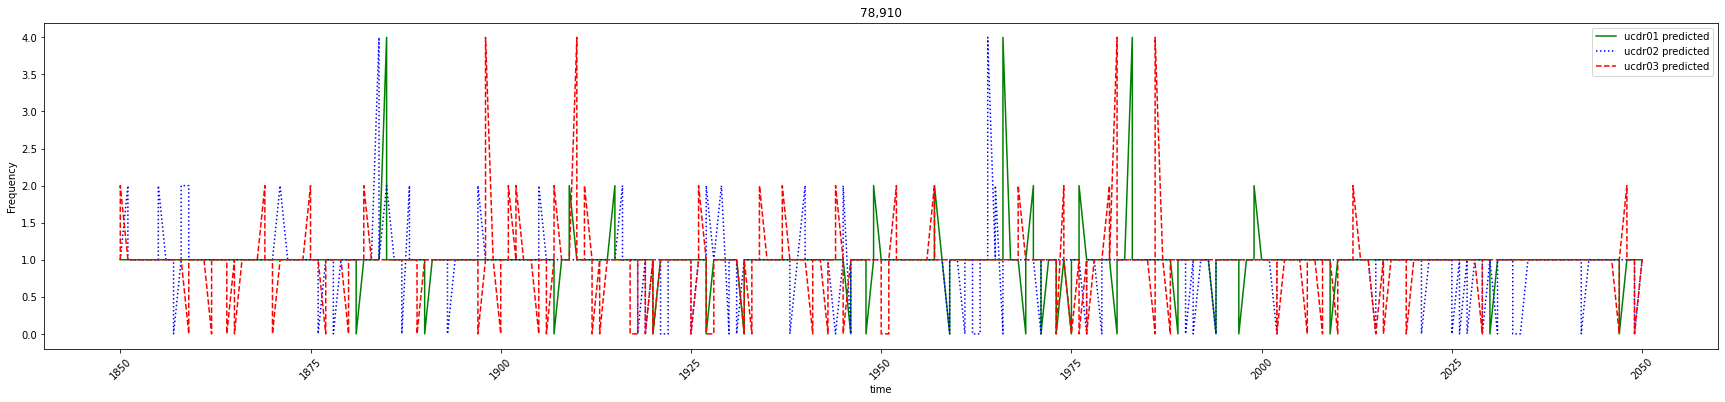

In [41]:
Y1 = pd.DataFrame(Y1)
Y1 = Y1.set_index(df5c["year"])
Y1a = Y1.iloc[range(0,401)]
Y1b = Y1.iloc[range(401,902)]

Y2 = pd.DataFrame(Y2)
Y2 = Y2.set_index(df6c["year"])
Y2a = Y2.iloc[range(0,401)]
Y2b = Y2.iloc[range(401,902)]

Y3 = pd.DataFrame(Y3)
Y3 = Y3.set_index(df7c["year"])
Y3a = Y3.iloc[range(0,401)]
Y3b = Y3.iloc[range(401,902)]

plt.figure(figsize=(30, 6))  

plt.plot(Y1a, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y2a, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y3a, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

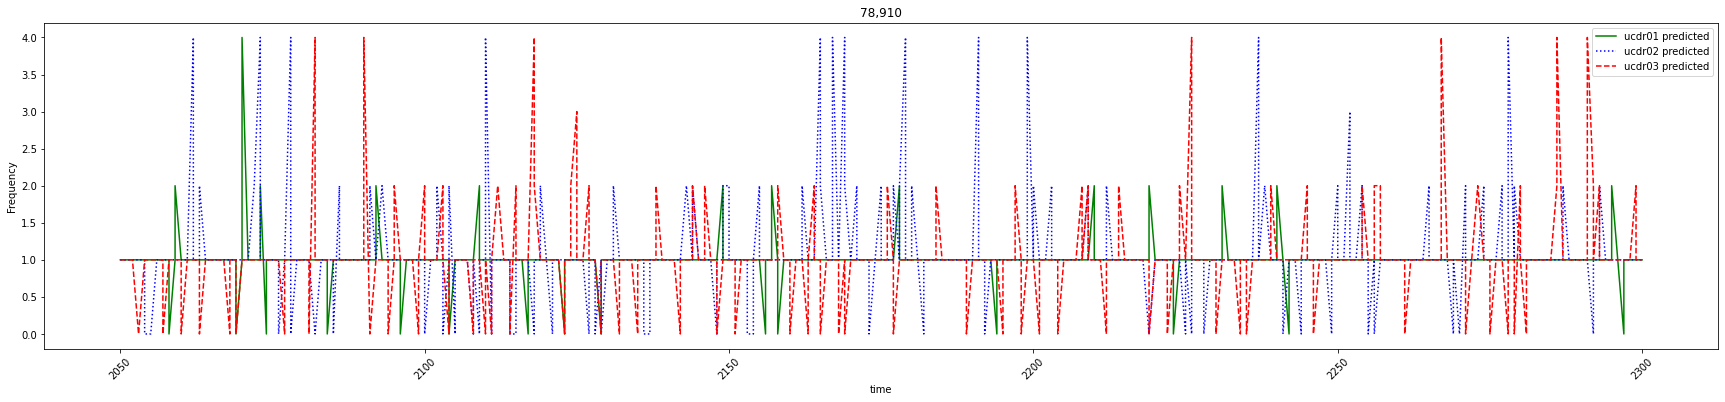

In [42]:
plt.figure(figsize=(30, 6))  

plt.plot(Y1b, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y2b, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y3b, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

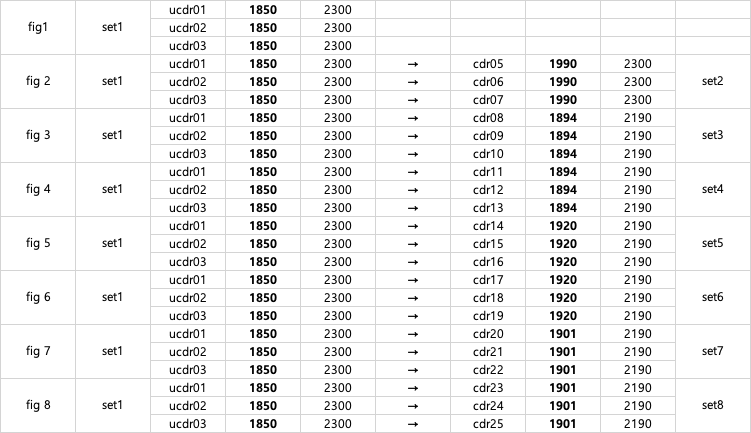

# Fig2 - ucdr01 + cdr05, ucdr02 + cdr06, ucdr03 + cdr07

In [51]:
df8 = pd.read_csv('cdr05.csv')
df9 = pd.read_csv('cdr06.csv')
df10 = pd.read_csv('cdr07.csv')

df8 = df8[df8["mon"].isin([7,8,9,10])]
df8a = df8[df8["mon"].isin([7,8])]
df8b = df8[df8["mon"].isin([9,10])]
df8a = df8a.groupby(['year'], as_index=False).mean()
df8b = df8b.groupby(['year'], as_index=False).mean()
df8c = pd.concat([df8a,df8b])
df8c = df8c.sort_values(by=['year'],ascending = True)

In [52]:
df9 = df9[df9["mon"].isin([7,8,9,10])]
df9a = df9[df9["mon"].isin([7,8])]
df9b = df9[df9["mon"].isin([9,10])]
df9a = df9a.groupby(['year'], as_index=False).mean()
df9b = df9b.groupby(['year'], as_index=False).mean()
df9c = pd.concat([df9a,df9b])
df9c = df9c.sort_values(by=['year'],ascending = True)

In [53]:
df10 = df10[df10["mon"].isin([7,8,9,10])]
df10a = df10[df10["mon"].isin([7,8])]
df10b = df10[df10["mon"].isin([9,10])]
df10a = df10a.groupby(['year'], as_index=False).mean()
df10b = df10b.groupby(['year'], as_index=False).mean()
df10c = pd.concat([df10a,df10b])
df10c = df10c.sort_values(by=['year'],ascending = True)

In [56]:
df5d = df5c[df5c["year"].isin(list(range(1850,1990,1)))]
df8d = df8c[df8c["year"].isin(list(range(1990,2301,1)))]
df5e = pd.concat([df5d,df8d])
df5e = df5e.sort_values(by=['year'],ascending = True)
X4 = df5e.iloc[:,2:12]

In [58]:
df6d = df6c[df6c["year"].isin(list(range(1850,1990,1)))]
df9d = df9c[df9c["year"].isin(list(range(1990,2301,1)))]
df6e = pd.concat([df6d,df9d])
df6e = df6e.sort_values(by=['year'],ascending = True)
X5 = df6e.iloc[:,2:12]

,year,mon,aao,amo,ao,emi,gmt,nino3,nino4,pdo,pna,qbo
0,1850,7.5,-9.238100e+35,-0.5435,-8.2280,0.2985,-4.0275,-6.0545,-4.6835,-490.8760,-0.4680,-26.7230
0,1850,9.5,-1.877415e+37,-0.4455,113.9460,0.2375,-3.9975,-5.6610,-4.6555,-491.9840,0.2640,-30.7500
1,1851,7.5,-3.124475e+37,-0.7365,-31.0915,-0.2805,-4.0985,-6.9860,-5.7135,-496.0675,-0.1080,21.3590
1,1851,9.5,-1.498396e+37,-0.7480,5.2260,-0.2500,-4.0835,-6.9425,-5.8430,-496.3575,-0.4515,18.5780
2,1852,7.5,-2.831955e+37,-0.3225,-1.1570,-0.0315,-4.0675,-5.9290,-5.5840,-497.8205,-0.6110,22.5190
...,...,...,...,...,...,...,...,...,...,...,...,...
308,2298,7.5,-1.099263e+37,-0.2030,-42.9900,-0.6445,-3.3465,-4.7825,-4.6285,-474.9490,-1.7145,11.5225
309,2299,9.5,7.215870e+36,-0.1415,-84.8055,0.1090,-3.3605,-3.8605,-3.7950,-471.1040,-0.5550,-28.1645
309,2299,7.5,1.971760e+37,-0.0840,50.5850,-0.1435,-3.3795,-4.4415,-4.2350,-472.4565,-1.4160,-25.3925
310,2300,7.5,1.596095e+37,0.0880,-23.0190,0.3490,-3.4160,-4.6410,-4.1760,-467.1175,-1.8905,-2.6780


In [59]:
df7d = df7c[df7c["year"].isin(list(range(1850,1990,1)))]
df10d = df10c[df10c["year"].isin(list(range(1990,2301,1)))]
df7e = pd.concat([df7d,df10d])
df7e = df7e.sort_values(by=['year'],ascending = True)
X6 = df7e.iloc[:,2:12]

In [60]:
Y4 = model5.predict(X4)
Y5 = model5.predict(X5)
Y6 = model5.predict(X6)

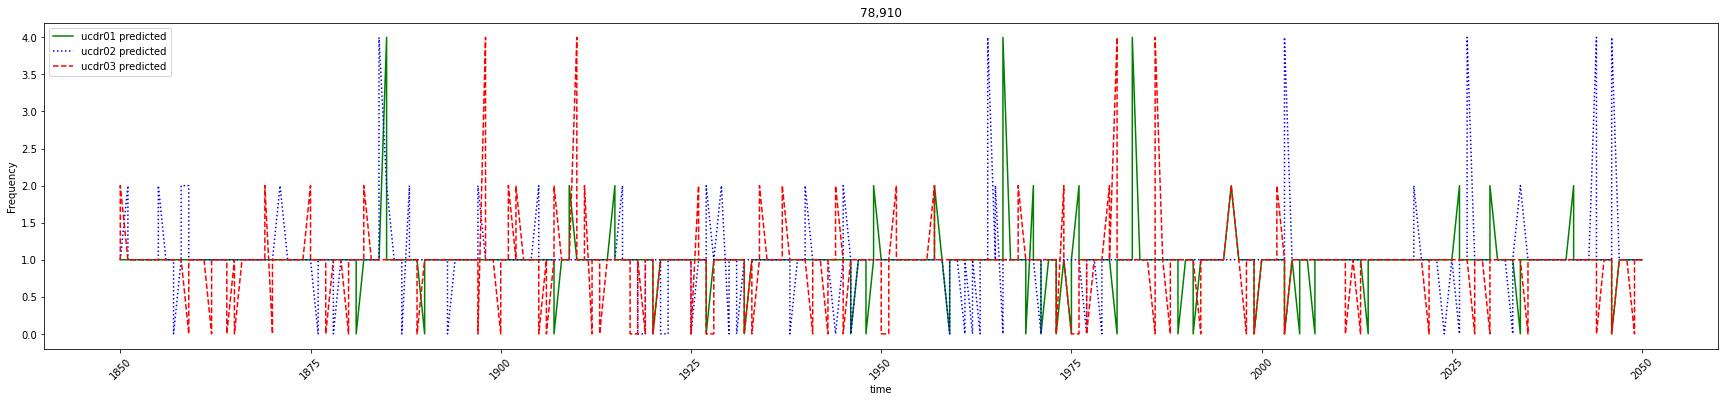

In [61]:
Y4 = pd.DataFrame(Y4)
Y4 = Y4.set_index(df5e["year"])
Y4a = Y4.iloc[range(0,401)]
Y4b = Y4.iloc[range(401,902)]

Y5 = pd.DataFrame(Y5)
Y5 = Y5.set_index(df6e["year"])
Y5a = Y5.iloc[range(0,401)]
Y5b = Y5.iloc[range(401,902)]

Y6 = pd.DataFrame(Y6)
Y6 = Y6.set_index(df7e["year"])
Y6a = Y6.iloc[range(0,401)]
Y6b = Y6.iloc[range(401,902)]

plt.figure(figsize=(30, 6))  

plt.plot(Y4a, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y5a, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y6a, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

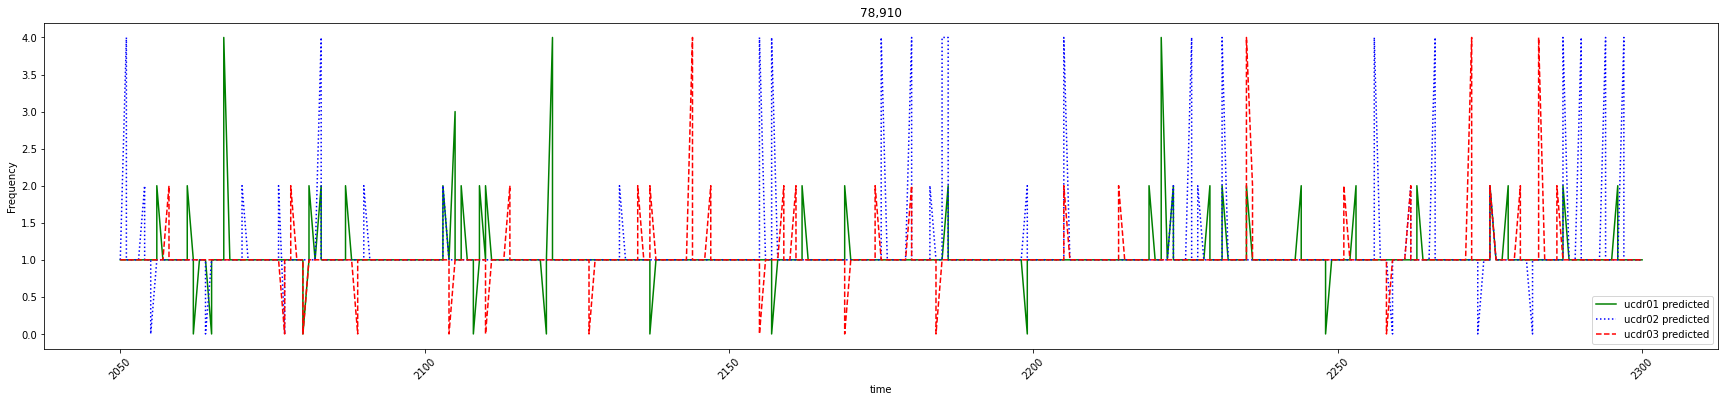

In [62]:
plt.figure(figsize=(30, 6))  

plt.plot(Y4b, color='green',linestyle = '-', label='ucdr01 predicted')
plt.plot(Y5b, color='blue',linestyle = ':', label='ucdr02 predicted')
plt.plot(Y6b, color='red',linestyle = '--', label='ucdr03 predicted')

plt.title('78,910')
plt.xlabel('time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()